# **Convolutional Neural Network using MNIST dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [2]:
(X_trains,y_train), (X_test,y_test)= load_data()

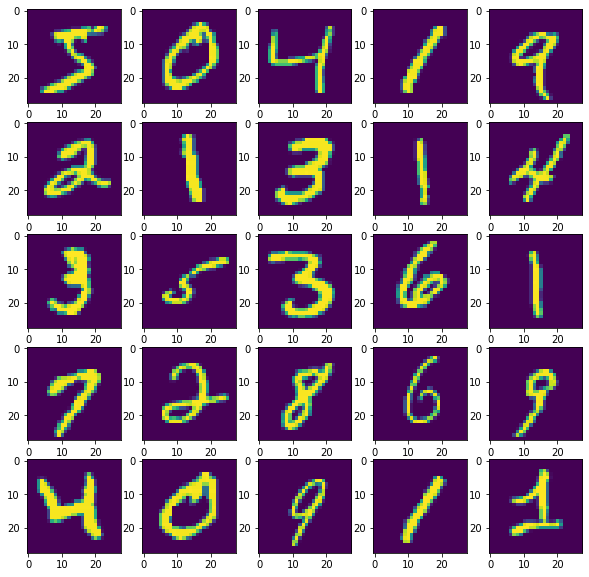

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_trains[i])
  #plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [4]:
X_trains.shape

(60000, 28, 28)

In [5]:
X_train= X_trains.reshape((X_trains.shape[0],X_trains.shape[1],X_trains.shape[2],1))
X_train.shape

(60000, 28, 28, 1)

In [6]:
X_test= X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
X_test.shape

(10000, 28, 28, 1)

In [7]:
input_shape=X_train.shape[1:]
input_shape

(28, 28, 1)

In [8]:
from numpy import unique
n_classes= len(unique(y_train))
n_classes

10

In [9]:
X_train= X_train.astype('float32')/255.0
X_train[0:1]

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         

In [10]:
X_test= X_test.astype('float32')/255.0

Epoch 1/5
469/469 [==============================] - 35s 72ms/step - loss: 0.3597 - accuracy: 0.8903
Epoch 2/5
469/469 [==============================] - 27s 58ms/step - loss: 0.1507 - accuracy: 0.9557
Epoch 3/5
469/469 [==============================] - 34s 73ms/step - loss: 0.1127 - accuracy: 0.9669
Epoch 4/5
469/469 [==============================] - 28s 59ms/step - loss: 0.0908 - accuracy: 0.9728
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0475 - accuracy: 0.9846
Accuracy of model is : 0.985
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                    

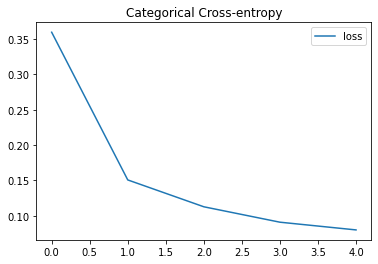

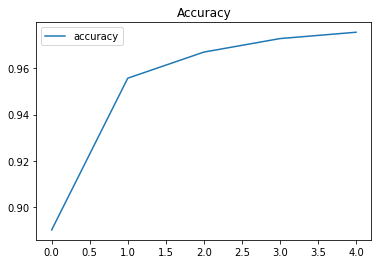

In [11]:
# Apply Convolution 
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform', input_shape=input_shape))

# Apply MaxPool
model.add(MaxPool2D((2,2)))

# Apply Flatten to transform matrix to vector form
model.add(Flatten())

# Define model
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes,activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit model
history = model.fit(X_train, y_train, epochs=5, batch_size=128,verbose=1)

# Evaluate Model
loss, acc = model.evaluate(X_test, y_test)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot(title="Categorical Cross-entropy")
history_df.loc[:, ['accuracy']].plot(title="Accuracy")
print('Accuracy of model is : %.3f' %acc)
model.summary()

1/1 [==============================] - 0s 88ms/step
Predicted = 9


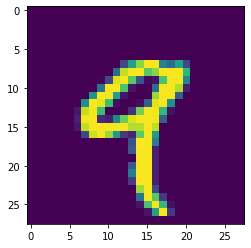

In [12]:
# Predict Model
image=X_train[4]
from numpy import argmax
ypred= model.predict(np.asarray([image]))
print('Predicted = %d' %argmax(ypred))
plt.imshow(X_trains[4])